<a href="https://colab.research.google.com/github/siming-deng/cis4170_Data_Visualization/blob/main/CIS4170_Project_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/siming-deng/cis4170_Data_Visualization/main/UK_US_Russia_EPU_Data.csv')
df

,year,month,UK_EPU_Index,Russia_EPU_Index,US_EPU_Index
0,1998,1,114,61,108
1,1998,2,71,30,101
2,1998,3,148,47,83
3,1998,4,147,30,74
4,1998,5,112,35,80
...,...,...,...,...,...
287,2021,12,175,394,201
288,2022,1,88,275,155
289,2022,2,81,703,140
290,2022,3,170,355,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              292 non-null    int64
 1   month             292 non-null    int64
 2   UK_EPU_Index      292 non-null    int64
 3   Russia_EPU_Index  292 non-null    int64
 4   US_EPU_Index      292 non-null    int64
dtypes: int64(5)
memory usage: 11.5 KB


In [4]:
df['year-month'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df.head()

,year,month,UK_EPU_Index,Russia_EPU_Index,US_EPU_Index,year-month
0,1998,1,114,61,108,1998-1
1,1998,2,71,30,101,1998-2
2,1998,3,148,47,83,1998-3
3,1998,4,147,30,74,1998-4
4,1998,5,112,35,80,1998-5


In [5]:
recent_data_df = df[df['year'] >= 2021]
recent_data_df

,year,month,UK_EPU_Index,Russia_EPU_Index,US_EPU_Index,year-month
276,2021,1,113,503,261,2021-1
277,2021,2,138,418,188,2021-2
278,2021,3,142,376,167,2021-3
279,2021,4,95,283,141,2021-4
280,2021,5,98,348,172,2021-5
281,2021,6,90,420,149,2021-6
282,2021,7,88,225,182,2021-7
283,2021,8,79,185,157,2021-8
284,2021,9,79,377,171,2021-9
285,2021,10,104,268,137,2021-10


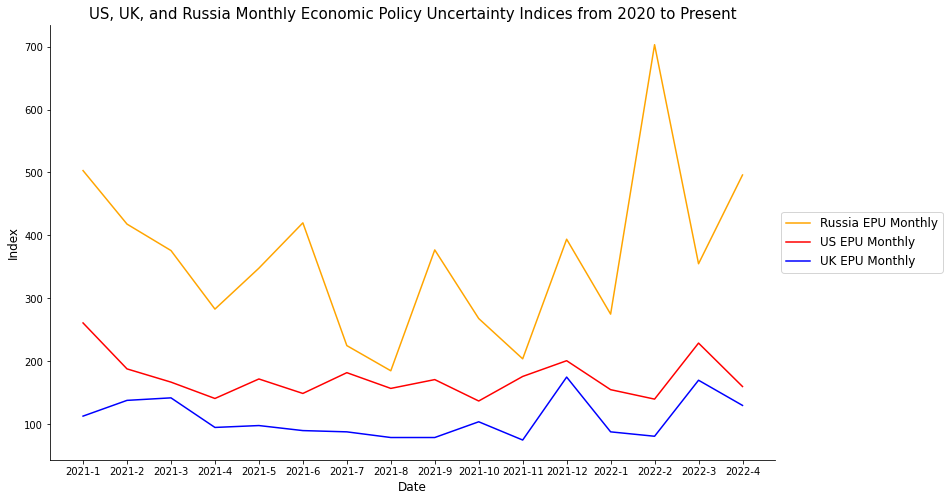

In [6]:
fig = plt.figure(figsize = (13,8))
ax = fig.add_subplot(111)
ax.plot(recent_data_df['year-month'], recent_data_df['Russia_EPU_Index'], color = 'orange', label = 'Russia EPU Monthly')
ax.plot(recent_data_df['year-month'], recent_data_df['US_EPU_Index'], color = 'red', label = 'US EPU Monthly')
ax.plot(recent_data_df['year-month'], recent_data_df['UK_EPU_Index'], color = 'blue', label = 'UK EPU Monthly')
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Index', fontsize = 12)
ax.set_title('US, UK, and Russia Monthly Economic Policy Uncertainty Indices from 2020 to Present', fontsize = 15,)
ax.legend(fontsize = 12, loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('US, UK, and Russia EPU Monthly Index.png', bbox_inches = 'tight')

In [7]:
gdp_df = pd.read_csv('https://raw.githubusercontent.com/siming-deng/cis4170_Data_Visualization/main/Statista_Estimated_GDP.csv')
gdp_df

,Unnamed: 0,year,% change,Unnamed: 3,Unnamed: 4
0,Russia,2022,-0.70,NaN,NaN
1,Russia,2023,-1.21,NaN,NaN
2,Russia,2024,-1.15,NaN,NaN
3,Eurozone,2022,-0.31,NaN,NaN
4,Eurozone,2023,-0.54,NaN,NaN
5,Eurozone,2024,-0.50,NaN,NaN
6,UK,2022,-0.25,NaN,NaN
7,UK,2023,-0.51,NaN,NaN
8,UK,2024,-0.52,NaN,NaN
9,US,2022,-0.17,NaN,NaN


In [8]:
gdp_new_df = gdp_df[['Unnamed: 0', 'year', '% change']]
gdp_new_df

,Unnamed: 0,year,% change
0,Russia,2022,-0.70
1,Russia,2023,-1.21
2,Russia,2024,-1.15
3,Eurozone,2022,-0.31
4,Eurozone,2023,-0.54
5,Eurozone,2024,-0.50
6,UK,2022,-0.25
7,UK,2023,-0.51
8,UK,2024,-0.52
9,US,2022,-0.17


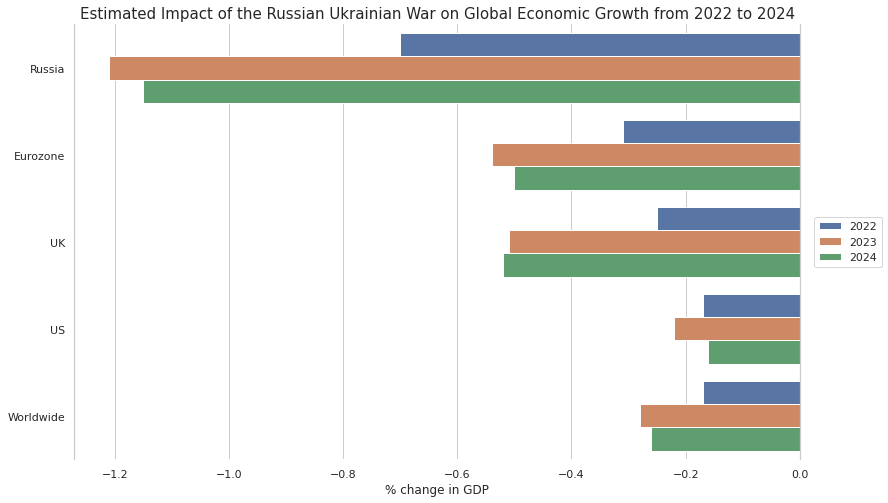

In [16]:
fig = plt.figure(figsize = (13,8))
ax = fig.add_subplot(111)
sns.set_theme(style = 'whitegrid')
p = sns.barplot(x = '% change', y = 'Unnamed: 0', hue = 'year', data = gdp_new_df).set(ylabel = None)
ax.set_title('Estimated Impact of the Russian Ukrainian War on Global Economic Growth from 2022 to 2024', fontsize = 15)
ax.set_xlabel('% change in GDP', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
fig.savefig('Estimated_GDP_Growth.png', bbox_inches = 'tight')

In [20]:
f = open('/content/response_1652641237792.json')
data = json.load(f)
print(data)

{'IMOEX.ME': {'timestamp': [1494829800, 1494916200, 1495002600, 1495089000, 1495175400, 1495434600, 1495521000, 1495607400, 1495693800, 1495780200, 1496039400, 1496125800, 1496212200, 1496298600, 1496385000, 1496644200, 1496730600, 1496817000, 1496903400, 1496989800, 1497335400, 1497421800, 1497508200, 1497594600, 1497853800, 1497940200, 1498026600, 1498113000, 1498199400, 1498458600, 1498545000, 1498631400, 1498717800, 1498804200, 1499063400, 1499149800, 1499236200, 1499322600, 1499409000, 1499668200, 1499754600, 1499841000, 1499927400, 1500013800, 1500273000, 1500359400, 1500445800, 1500532200, 1500618600, 1500877800, 1500964200, 1501050600, 1501137000, 1501223400, 1501482600, 1501569000, 1501655400, 1501741800, 1501828200, 1502087400, 1502173800, 1502260200, 1502346600, 1502433000, 1502692200, 1502778600, 1502865000, 1502951400, 1503037800, 1503297000, 1503383400, 1503469800, 1503556200, 1503642600, 1503901800, 1503988200, 1504074600, 1504161000, 1504247400, 1504506600, 1504593000, 

In [ ]:
formatted_json = json.dumps(data, indent = 4)
print(formatted_json)

In [44]:
IMOEX_date = []

for i in data['IMOEX.ME']['timestamp']:
  dt_object = datetime.fromtimestamp(i)
  IMOEX_date.append(dt_object)
#print(date)

IMOEX_stocks = {
    'dates': IMOEX_date,
    'IMOEX_close': data['IMOEX.ME']['close']
}

IMOEX_stocks_df = pd.DataFrame(IMOEX_stocks)
IMOEX_stocks_df['dates'] = IMOEX_stocks_df['dates'].dt.date
IMOEX_stocks_df

,dates,IMOEX_close
0,2017-05-15,2003.12
1,2017-05-16,1992.94
2,2017-05-17,1994.35
3,2017-05-18,1967.66
4,2017-05-19,1962.40
...,...,...
1221,2022-05-05,2404.80
1222,2022-05-06,2393.03
1223,2022-05-11,2387.14
1224,2022-05-12,2297.89


In [45]:
CL_date = []

for i in data['CL=F']['timestamp']:
  dt_object = datetime.fromtimestamp(i)
  CL_date.append(dt_object)

CL_stocks = {
    'dates': CL_date,
    'CL_close': data['CL=F']['close']
}

CL_stocks_df = pd.DataFrame(CL_stocks)
CL_stocks_df['dates'] = CL_stocks_df['dates'].dt.date
CL_stocks_df
#CL_stocks_new_df = CL_stocks_df.tail(1200)
#CL_stocks_new_df

,dates,CL_close
0,2017-05-15,48.85
1,2017-05-16,48.66
2,2017-05-17,49.07
3,2017-05-18,49.35
4,2017-05-19,50.33
...,...,...
1256,2022-05-09,103.09
1257,2022-05-10,99.76
1258,2022-05-11,105.71
1259,2022-05-12,106.13


In [46]:
merged_df = pd.merge(CL_stocks_df, IMOEX_stocks_df, how = 'inner', on = ['dates'])
merged_df

,dates,CL_close,IMOEX_close
0,2017-05-15,48.85,2003.12
1,2017-05-16,48.66,1992.94
2,2017-05-17,49.07,1994.35
3,2017-05-18,49.35,1967.66
4,2017-05-19,50.33,1962.40
...,...,...,...
1188,2022-05-05,108.26,2404.80
1189,2022-05-06,109.77,2393.03
1190,2022-05-11,105.71,2387.14
1191,2022-05-12,106.13,2297.89


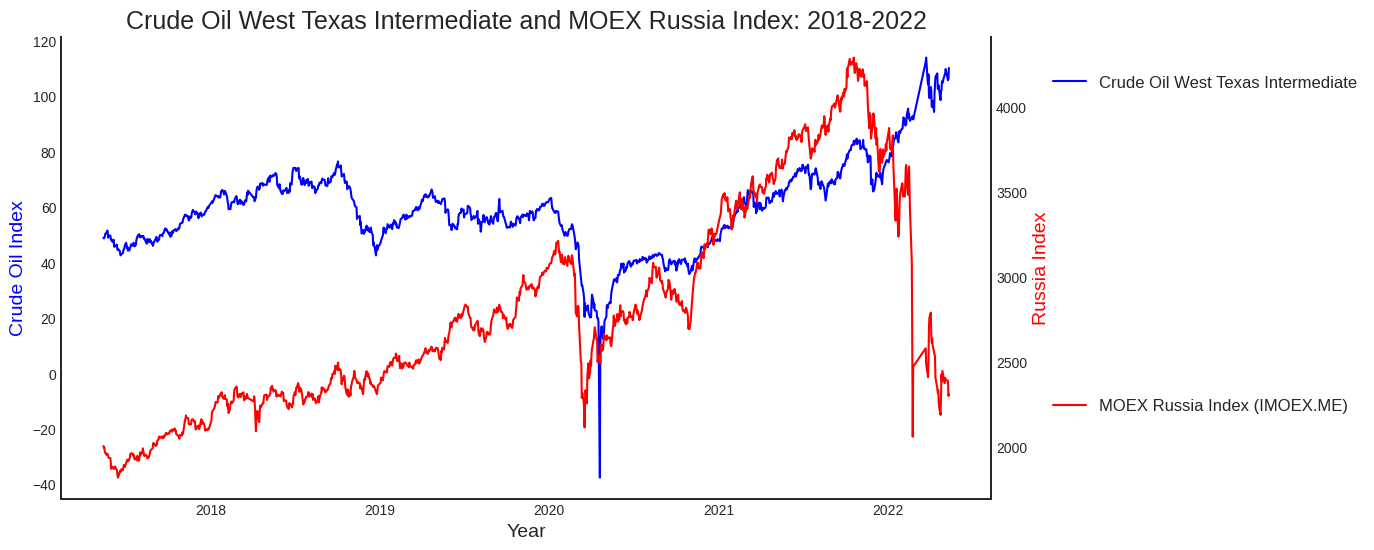

In [82]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.plot(merged_df['dates'], merged_df['CL_close'], color = 'blue', label = 'Crude Oil West Texas Intermediate')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Crude Oil Index', fontsize = 14, color = 'blue')

ax2 = ax.twinx()
ax2.plot(merged_df['dates'], merged_df['IMOEX_close'], color = 'red', label = 'MOEX Russia Index (IMOEX.ME)')
ax2.set_ylabel('Russia Index', fontsize = 14, color = 'red')
ax2.legend(fontsize = 12, loc='center left', bbox_to_anchor=(1.05, 0.2))

ax.set_title('Crude Oil West Texas Intermediate and MOEX Russia Index: 2018-2022', fontsize = 18)
ax.legend(fontsize = 12, loc='center left', bbox_to_anchor=(1.05, 0.9))
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
fig.savefig('Crude Oil and Russia Index: 2018-2022', bbox_inches = 'tight')